# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('geo.xlsx').drop('Unnamed: 0', axis=1)
df.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [3]:
df = df.sample(frac = 0.1)
df.head()

,x,y,comment_class
32817,37.805293,55.799532,1
60854,37.680607,55.682590,-1
100550,37.454528,55.792331,-1
68712,37.559640,55.768831,-1
5282,37.590973,55.759532,-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10881 entries, 32817 to 12341
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   x              10881 non-null  float64
 1   y              10881 non-null  float64
 2   comment_class  10881 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 340.0 KB


In [10]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np

In [11]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

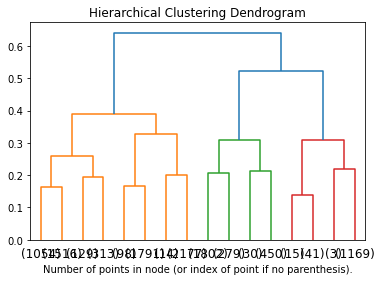

In [14]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')

model = model.fit(df[df.columns[0:2]])
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

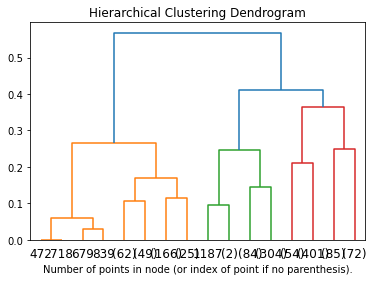

In [15]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
df_for = df[df['comment_class'] == 1]
model = model.fit(df_for[df_for.columns[0:2]])
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

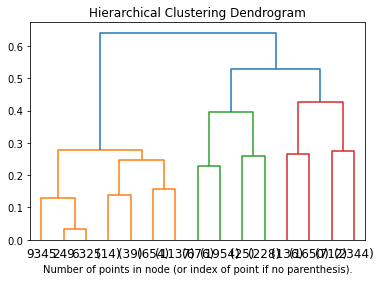

In [16]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
df_for = df[df['comment_class'] == -1]
model = model.fit(df_for[df_for.columns[0:2]])
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [17]:
import hdbscan

In [47]:
# points = np.array([[lat1, lon1], [lat2, lon2], ...])
# rads = np.radians(df[df.columns[0:2]])
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='haversine')
df['cluster_labels'] = clusterer.fit_predict(df[df.columns[0:2]])

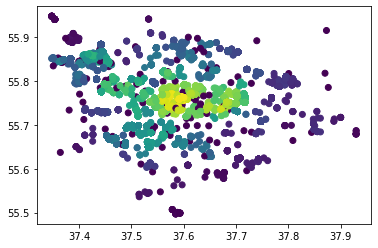

In [48]:
plt.scatter(df.x, df.y, c=df['cluster_labels'], cmap='viridis')